# Problem 7


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

## Angle between sun plane and earth axis

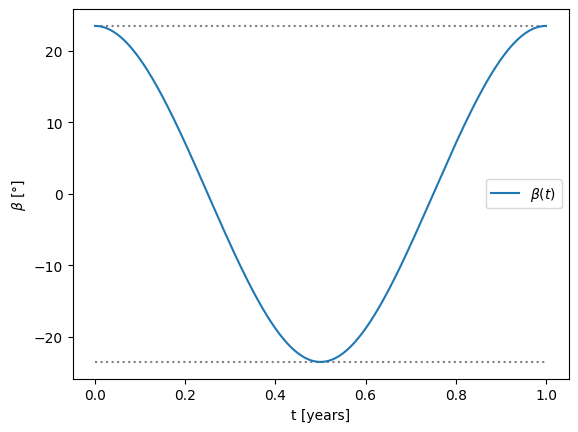

In [49]:
# Earth tilt = maximal angle
b0 = 23.5 * np.pi / 180

# Calculate the angles
t_vals = np.linspace(0, 1, 1000)
b = lambda t : np.arcsin(np.cos(2*np.pi*t)*np.sin(b0))
b_vals = b(t_vals)

deg = lambda rad : rad * 180/np.pi

plt.plot((0, 1), (deg(b0), deg(b0)),   c="gray",ls="dotted")
plt.plot((0, 1), (-deg(b0), -deg(b0)), c="gray",ls="dotted")
plt.plot(t_vals, deg(b_vals), label=r"$\beta(t)$")
plt.xlabel("t [years]")
plt.ylabel(r"$\beta$ [$\degree$]")
plt.legend()
plt.show()

$t=0$ marks northern winter solstice and southern summer solstice.

## Dot product between surface normal and incident light

Applying $\beta$ rotation matrix about the appropriate axis, we obtain:

$$
    n_x = \cos{\theta} \cos{\phi} \cos{\beta} + \sin{\phi}\sin{\beta}
$$

Noting that $\boldsymbol{n}\cdot\boldsymbol{x} = n_x$ we find that the condition $n_x > 0$ gives the angles $\theta$ with incoming sunglight. 

In [50]:
nx = lambda theta, p, b : np.cos(theta)*np.cos(p)*np.cos(b) + np.sin(p)*np.sin(b)

## Time of daylight

/var/folders/sv/8cdjtn6j7yld2hs1_9n07x2h0000gn/T/ipykernel_64825/72934804.py:8: RuntimeWarning: invalid value encountered in arccos
  np.arccos(- np.tan(b) * np.tan(p))))


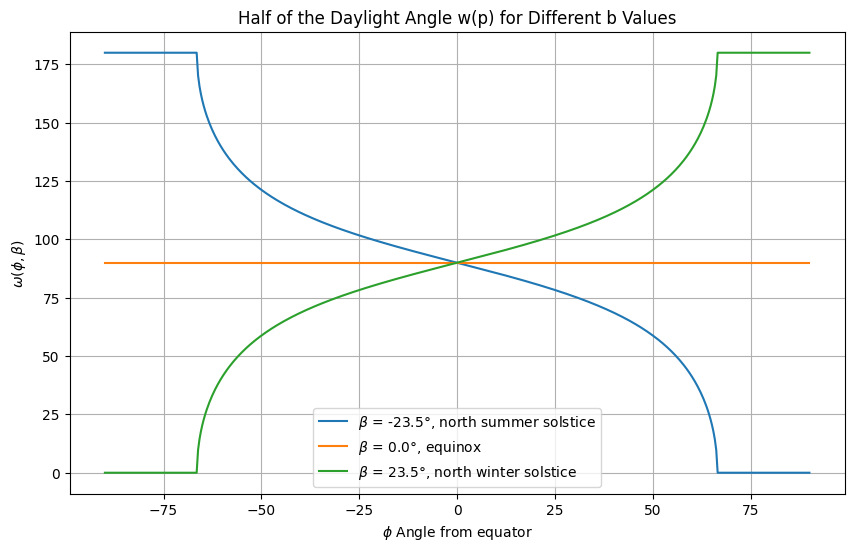

In [51]:
def w(p, b):
    """
    Computes half of the daylight angle at azimuth angle p and earth tilt relative to the sun b.
    """
    # Array-based conditional checks
    result = np.where(np.tan(b) * np.tan(p) >= 1, np.pi,
                      np.where(np.tan(b) * np.tan(p) <= - 1, 0,
                               np.arccos(- np.tan(b) * np.tan(p))))
    return result

# TODO: FORTEGN ER FLIPPA ?????

# Define b0 in radians
b0 = 23.5 * np.pi / 180

# Define a range of p values
p_values = np.linspace(-np.pi/2, np.pi/2, 500)

# Plot w(p) for each b value
plt.figure(figsize=(10, 6))

plt.plot(deg(p_values), deg(w(p_values, -b0)), label=rf"$\beta$ = {deg(-b0):.1f}°, north summer solstice")
plt.plot(deg(p_values), deg(w(p_values, 0)), label=rf"$\beta$ = {deg(0):.1f}°, equinox")
plt.plot(deg(p_values), deg(w(p_values, b0)), label=rf"$\beta$ = {deg(b0):.1f}°, north winter solstice")


plt.xlabel(r"$\phi$ Angle from equator")
plt.ylabel(r"$\omega(\phi, \beta )$")
plt.title("Half of the Daylight Angle w(p) for Different b Values")
plt.legend()
plt.grid(True)
plt.show()

# TODO: clearly something wrong as the results are flipped ...


Note: at tilt b=0 relative to sun, all latitude have equal part day and night



/var/folders/sv/8cdjtn6j7yld2hs1_9n07x2h0000gn/T/ipykernel_64825/72934804.py:8: RuntimeWarning: invalid value encountered in arccos
  np.arccos(- np.tan(b) * np.tan(p))))


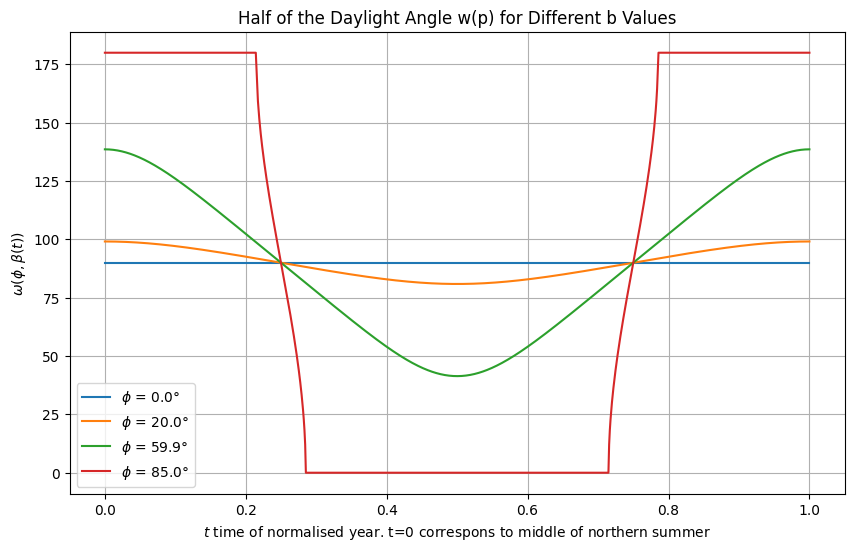

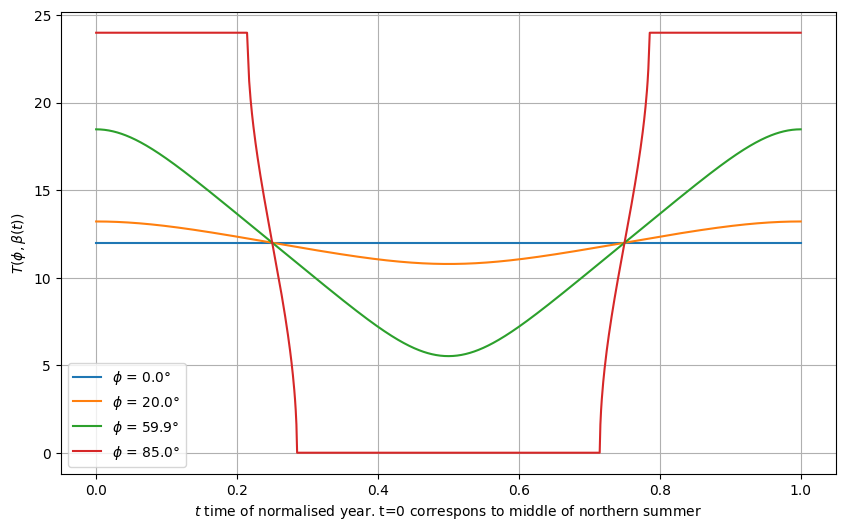

In [52]:
# Can also consider fixed lattitude

# Time (1 year) and corresponding tilts relative to sun
t_vals = np.linspace(0, 1, 1000)
b_vals = b(t_vals)

# Angle from equator
p_vals = [0, np.radians(20), np.radians(59.9), np.radians(85)]

# Plot w(p) for each b value
plt.figure(figsize=(10, 6))

for p_val in p_vals:
    w_vals = w(p_val, b_vals)
    plt.plot(t_vals, deg(w_vals), label=rf"$\phi$ = {deg(p_val):.1f}°")

plt.xlabel(r"$t$ time of normalised year. t=0 correspons to middle of northern summer")
plt.ylabel(r"$\omega(\phi, \beta(t) )$")
plt.title("Half of the Daylight Angle w(p) for Different b Values")
plt.legend()
plt.grid(True)
plt.show()

# Plot T(p) for each b value
plt.figure(figsize=(10, 6))

for p_val in p_vals:
    w_vals = w(p_val, b_vals)
    plt.plot(t_vals, 24*deg(w_vals)/180, label=rf"$\phi$ = {deg(p_val):.1f}°")

plt.xlabel(r"$t$ time of normalised year. t=0 correspons to middle of northern summer")
plt.ylabel(r"$T(\phi, \beta(t) )$")
plt.legend()
plt.grid(True)
plt.show()


## Intensity at time t, lattitude $\phi$


/var/folders/sv/8cdjtn6j7yld2hs1_9n07x2h0000gn/T/ipykernel_64825/72934804.py:8: RuntimeWarning: invalid value encountered in arccos
  np.arccos(- np.tan(b) * np.tan(p))))


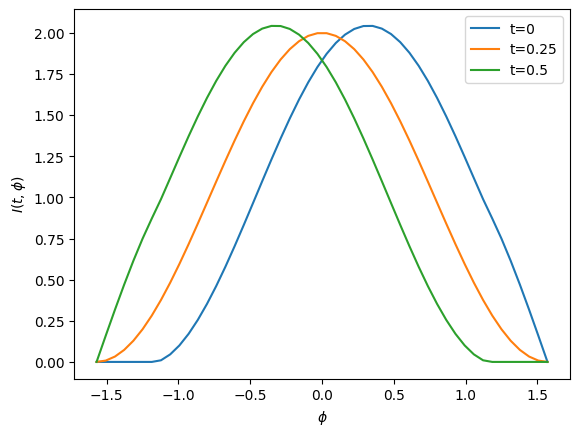

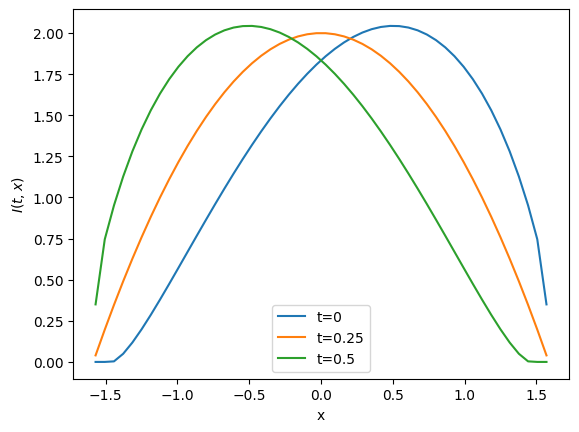

In [53]:
# Integrate from -w to w
from scipy.integrate import quad

def I(t, phi, R=1):

    # Compute tilt and daytime. Check for empty day
    beta = b(t)
    w0 = w(phi, beta)
    if w0 == 0:
        return 0

    # Integrand
    def integrand(theta):
        return nx(theta, phi, beta) * R * np.cos(phi)
    
    # Integrate
    result, error = quad(integrand, -w0, w0)

    return result


# Plot distribution over phi
for t in [0, 0.25, 0.5]:
    p_vals = np.linspace(-np.pi/2, np.pi/2, 50)
    plt.plot(p_vals, [I(t, p) for p in p_vals], label = f"t={t}")

plt.xlabel(r"$\phi$")
plt.ylabel(r"$I(t, \phi)$")
plt.legend()
plt.show()

# Plot distribution over x
for t in [0, 0.25, 0.5]:
    x_vals = np.linspace(-0.99, 0.99, 50)
    plt.plot(p_vals, [I(t, np.arcsin(x)) for x in x_vals], label = f"t={t}")

plt.xlabel(r"x")
plt.ylabel(r"$I(t, x)$")
plt.legend()
plt.show()

# Yearly average

/var/folders/sv/8cdjtn6j7yld2hs1_9n07x2h0000gn/T/ipykernel_64825/72934804.py:8: RuntimeWarning: invalid value encountered in arccos
  np.arccos(- np.tan(b) * np.tan(p))))
/var/folders/sv/8cdjtn6j7yld2hs1_9n07x2h0000gn/T/ipykernel_64825/923816413.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, error = quad(integrand, 0, 1) / np.sqrt(1-x**2)


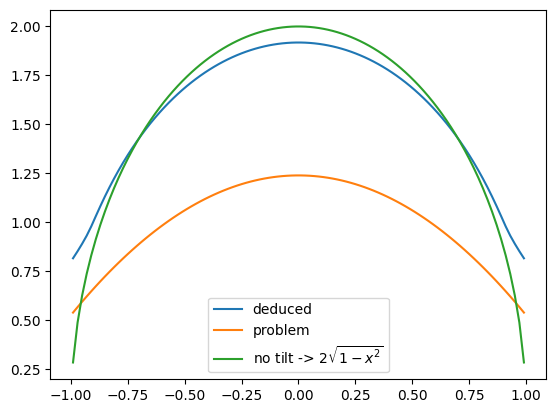

In [54]:
def S(x, R=1):
    integrand = lambda t : I(t, np.arcsin(x), R=R)
    result, error = quad(integrand, 0, 1) / np.sqrt(1-x**2)
    return result

S_problem = lambda x : 1 - 0.477*0.5*(3*x**2 - 1)


x_vals = np.linspace(-0.99, 0.99, 100)
S_num_vals = np.array([S(x) for x in x_vals])
S_prob_vals = S_problem(x_vals)

# Obtain same scale
#S_num_vals = S_num_vals * np.max(S_prob_vals) / np.max(S_num_vals)

plt.plot(x_vals, S_num_vals, label = "deduced")
plt.plot(x_vals, S_prob_vals, label = "problem")
plt.plot(x_vals, 2*np.sqrt(1-x_vals**2), label = r"no tilt -> $2\sqrt{1-x^2}$")
plt.legend()
plt.show()

# Final solution

A lot of the above was done with faulty idea of normalisation of S. This has been fixed per take2 image. The results are below:

In [96]:
def S_analytical(x):

    def integrand(theta, t):
        return np.maximum(0.0, nx(theta, np.arcsin(x), b(t)))
    
    r, err = dblquad(integrand, 0, 1, 0, 2*np.pi)
    r = 4*r / (2*np.pi)

    return r

# Compute double integral
x_vals = np.linspace(0, 0.999, 100)
S_vals = np.array([S_analytical(x) for x in x_vals])

/Users/trondjohansen/Desktop/matmod-prosjekt/climate-divergence/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


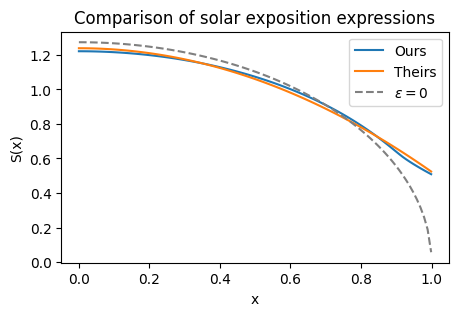

In [98]:
# Make plot
fig = plt.figure(figsize=(5, 3))

plt.plot(x_vals, S_vals, label="Ours")

S_prob_vals = S_problem(x_vals)
plt.plot(x_vals, S_prob_vals, label="Theirs")

S_no_tilt_vals = 4/np.pi * np.sqrt(1-x_vals**2)
plt.plot(x_vals, S_no_tilt_vals, label=r"$\varepsilon=0$",
         ls="dashed", color="gray")

# x_eps = np.sin(np.pi/2 - 23.5 * np.pi / 180)
# plt.plot((x_eps, x_eps), (0, 1.3), color="black", linestyle="dotted")

plt.title("Comparison of solar exposition expressions")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.legend()
plt.show()

### Sanity check

In [97]:
# Should integrate to 1 over x in [0, 1]
from scipy.integrate import simpson
print(simpson(S_vals, x=x_vals))

0.9994911595806797
